In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import  drive
import warnings
warnings.filterwarnings('ignore')
drive.mount('/drive', force_remount=True)

plt.rcParams['figure.figsize'] = (10.0, 10.0)
%matplotlib inline

counties = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv",encoding='ISO-8859-1',error_bad_lines=False)
states = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv",encoding='ISO-8859-1',error_bad_lines=False)
us = pd.read_csv("/drive/My Drive/covid19-dataset/covid-19-data/us.csv",encoding='ISO-8859-1',error_bad_lines=False)

In [44]:
counties.head()
counties.corr()

,fips,cases,deaths
fips,1.000000,-0.015958,-0.019435
cases,-0.015958,1.000000,0.961229
deaths,-0.019435,0.961229,1.000000


In [5]:
states.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [6]:
us.head()

,date,cases,deaths
0,2020-01-21,1,0
1,2020-01-22,1,0
2,2020-01-23,1,0
3,2020-01-24,2,0
4,2020-01-25,3,0


In [7]:
counties.info()
#Tofind Nulls
counties.isnull().sum()
counties.state.astype(str)
counties.corr()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135570 entries, 0 to 135569
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    135570 non-null  object 
 1   county  135570 non-null  object 
 2   state   135570 non-null  object 
 3   fips    134025 non-null  float64
 4   cases   135570 non-null  int64  
 5   deaths  135570 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 6.2+ MB


,fips,cases,deaths
fips,1.000000,-0.015958,-0.019435
cases,-0.015958,1.000000,0.961229
deaths,-0.019435,0.961229,1.000000


*Getting the count of Unique Values*

In [8]:
for k in range(len(counties.columns)):
    print(counties.columns[k] +","+str(len(counties[counties.columns[k]].unique())))

date,112
county,1715
state,55
fips,2886
cases,4082
deaths,899


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


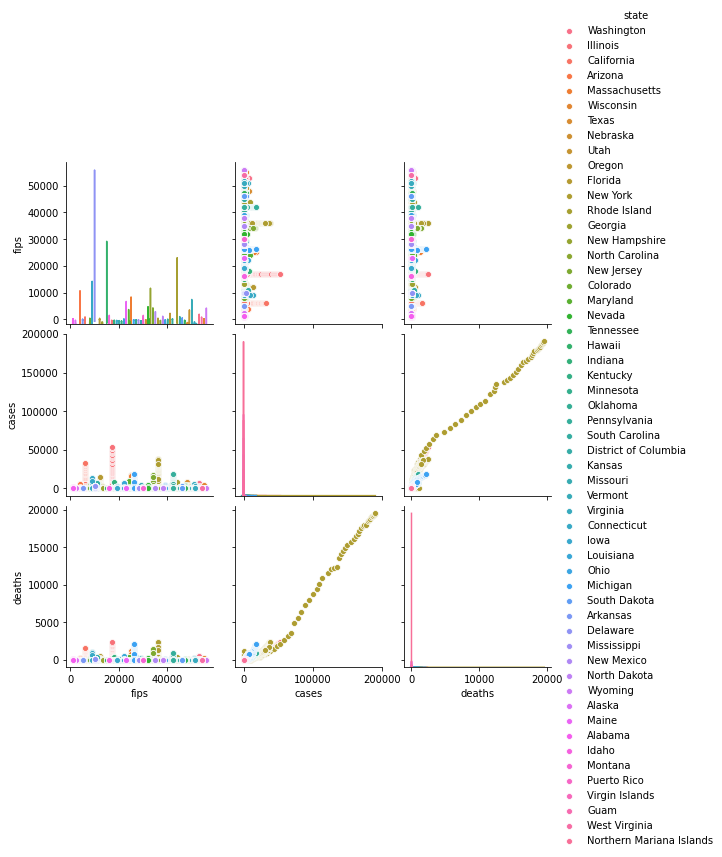

In [15]:
sns.pairplot(counties,hue="state")
plt.show()

*Populating top 5 states with number of cases*

In [13]:
top_5_df = list(set(zip(counties["state"],counties["cases"],counties["deaths"])))
top_5_df.sort(key = lambda x: x[1], reverse = True)
for sn,c,d in top_5_df[:5] :
    print("State Name:" ,sn)
    print("Cases:" ,c)
    print("Deaths \t:" ,d, '\n')

State Name: New York
Cases: 190546
Deaths 	: 19563 

State Name: New York
Cases: 189656
Deaths 	: 19436 

State Name: New York
Cases: 188663
Deaths 	: 19324 

State Name: New York
Cases: 187157
Deaths 	: 19210 

State Name: New York
Cases: 185653
Deaths 	: 19141 



*Populating top 5 states with number of cases on date*

In [14]:
top_5_df = list(set(zip(counties["state"],counties["date"],counties["cases"],counties["deaths"])))
top_5_df.sort(key = lambda x: x[2], reverse = True)
for sn,dt,c,d in top_5_df[:5] :
    print("State Name:" ,sn)
    print("Date:" ,dt)
    print("Cases:" ,c)
    print("Deaths \t:" ,d, '\n')

State Name: New York
Date: 2020-05-11
Cases: 190546
Deaths 	: 19563 

State Name: New York
Date: 2020-05-10
Cases: 189656
Deaths 	: 19436 

State Name: New York
Date: 2020-05-09
Cases: 188663
Deaths 	: 19324 

State Name: New York
Date: 2020-05-08
Cases: 187157
Deaths 	: 19210 

State Name: New York
Date: 2020-05-07
Cases: 185653
Deaths 	: 19141 



*Group a DF with state and cases*

In [30]:
state_cases = counties.groupby(["state"])["fips","cases","deaths"].sum()
state_cases.reset_index(level=0, inplace=True)
state_cases.head()

,state,fips,cases,deaths
0,Alabama,3490340.0,227480,7847
1,Alaska,1251793.0,13164,264
2,Arizona,3432060.0,242360,9738
3,Arkansas,17266284.0,98010,1973
4,California,20109463.0,1589903,58575


*Top 5 states Death Cases*

In [36]:
top_10_df = list(set(zip(state_cases["state"],state_cases["cases"],state_cases["deaths"],(state_cases["cases"]-state_cases["deaths"]))))
top_10_df.sort(key = lambda x: x[2], reverse = True)
for sn,c,d,sr in top_10_df[:10] :
    print("State Name:" ,sn)
    print("Cases:" ,c)
    print("Survivors:" ,sr)
    print("Deaths \t:" ,d, '\n')

State Name: New York
Cases: 10420223
Survivors: 9706145
Deaths 	: 714078 

State Name: New Jersey
Cases: 3725760
Survivors: 3528536
Deaths 	: 197224 

State Name: Michigan
Cases: 1352417
Survivors: 1245035
Deaths 	: 107382 

State Name: Massachusetts
Cases: 1804321
Survivors: 1712559
Deaths 	: 91762 

State Name: Pennsylvania
Cases: 1454305
Survivors: 1386905
Deaths 	: 67400 

State Name: Illinois
Cases: 1587303
Survivors: 1521380
Deaths 	: 65923 

State Name: Connecticut
Cases: 825247
Survivors: 765507
Deaths 	: 59740 

State Name: California
Cases: 1589903
Survivors: 1531328
Deaths 	: 58575 

State Name: Louisiana
Cases: 987684
Survivors: 931225
Deaths 	: 56459 

State Name: Florida
Cases: 1124889
Survivors: 1088010
Deaths 	: 36879 



*Top 10 State Survivors*

In [37]:
top_10_df.sort(key = lambda x: x[3], reverse = True)
for sn,c,d,sr in top_10_df[:10] :
    print("State Name:" ,sn)
    print("Cases:" ,c)
    print("Survivors:" ,sr)
    print("Deaths \t:" ,d, '\n')

State Name: New York
Cases: 10420223
Survivors: 9706145
Deaths 	: 714078 

State Name: New Jersey
Cases: 3725760
Survivors: 3528536
Deaths 	: 197224 

State Name: Massachusetts
Cases: 1804321
Survivors: 1712559
Deaths 	: 91762 

State Name: California
Cases: 1589903
Survivors: 1531328
Deaths 	: 58575 

State Name: Illinois
Cases: 1587303
Survivors: 1521380
Deaths 	: 65923 

State Name: Pennsylvania
Cases: 1454305
Survivors: 1386905
Deaths 	: 67400 

State Name: Michigan
Cases: 1352417
Survivors: 1245035
Deaths 	: 107382 

State Name: Florida
Cases: 1124889
Survivors: 1088010
Deaths 	: 36879 

State Name: Louisiana
Cases: 987684
Survivors: 931225
Deaths 	: 56459 

State Name: Texas
Cases: 906497
Survivors: 883074
Deaths 	: 23423 



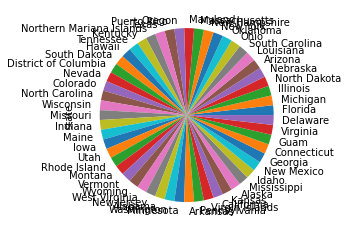

In [65]:
state_cases.state.value_counts(normalize=True).plot.barh()
plt.show()

# Slice out user rating and plot
#df_rat_by_year = df_med_by_year['user_rating_score']
#plt.scatter(df_rat_by_year.index, df_rat_by_year)
#plt.xlabel('year of release')
#plt.ylabel('median rating');

sns.boxplot(data = state_cases,x = "cases", y=st)
plt.show()

state_cases.state.value_counts().plot.pie()
plt.show()

In [103]:
st_df = counties[counties.state == 'New York']
st_df.date = pd.to_datetime(st_df.date)

st_df.reset_index(level=0, inplace=True)
st_df.drop(['index'],axis =1, inplace=True)
st_df.sort_values(by=['date'], inplace=True)

st_df.date.min()
st_df.isnull().sum()
st_df.info()
st_df.corr()
st_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3233 entries, 0 to 3232
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    3233 non-null   datetime64[ns]
 1   county  3233 non-null   object        
 2   state   3233 non-null   object        
 3   fips    3154 non-null   float64       
 4   cases   3233 non-null   int64         
 5   deaths  3233 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 176.8+ KB


,date,county,state,fips,cases,deaths
0,2020-03-01,New York City,New York,NaN,1,0
1,2020-03-02,New York City,New York,NaN,1,0
2,2020-03-03,New York City,New York,NaN,2,0
3,2020-03-04,New York City,New York,NaN,2,0
4,2020-03-04,Westchester,New York,36119.0,9,0


*Cumulative subtraction for death cases*

In [0]:
st_df['cum_death_total'] = st_df['deaths'].sub(st_df['deaths'].shift())
st_df['cum_death_total'].iloc[0] = st_df['deaths'].iloc[0]

*Creating Bin Range for Date*

In [112]:
dfd = pd.DataFrame(pd.date_range('2020-01-01', end='2020-06-30', freq='15D'), columns=['Date'])
bins_dt = pd.date_range('2020-01-01', end='2020-06-30',freq='15D')
bins_str = bins_dt.astype(str).values

labels = ['{}-{}'.format((bins_str[i-1]).replace('-',''), (bins_str[i]).replace('-','')) for i in range(1, len(bins_str))]
print(labels)

st_df['date_bin'] = pd.cut(st_df.date.astype(np.int64)//10**9,
                           bins=bins_dt.astype(np.int64)//10**9,
                           labels=labels)

['20200101-20200116', '20200116-20200131', '20200131-20200215', '20200215-20200301', '20200301-20200316', '20200316-20200331', '20200331-20200415', '20200415-20200430', '20200430-20200515', '20200515-20200530', '20200530-20200614', '20200614-20200629']


*Now Checking and Analyzing the DF for NY*

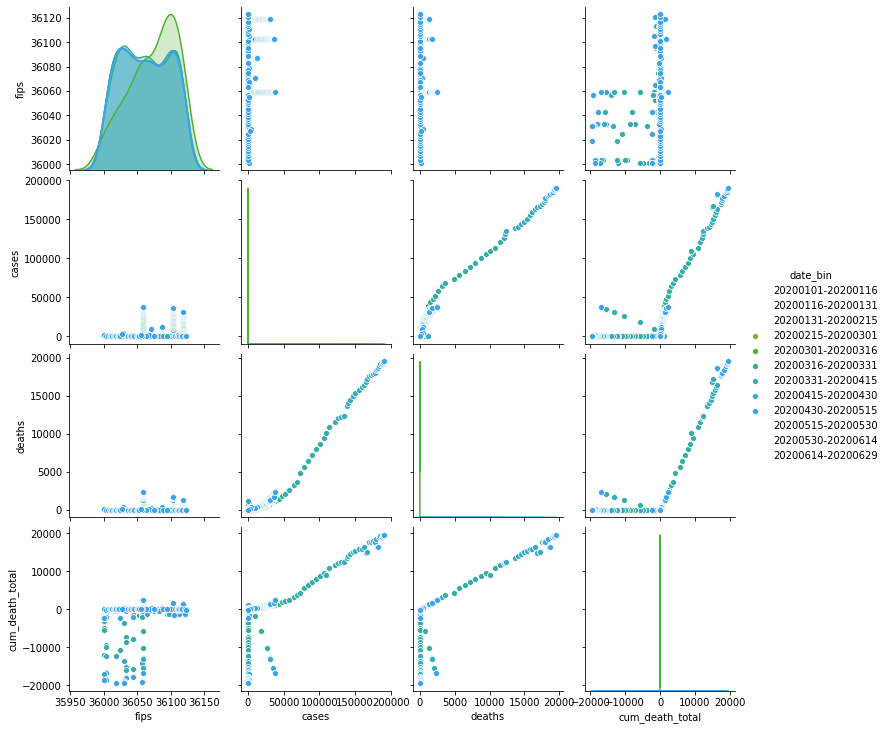

In [128]:
st_df.date_bin.value_counts().plot.pie()
plt.show()

sns.boxplot(data = st_df,x = "deaths", y="date_bin")
plt.show()

st_df.date_bin.value_counts(normalize=True).plot.barh()
plt.show()

st_df.date_bin.value_counts().plot.barh()
plt.show()

sns.scatterplot(data = st_df,x="deaths", y="date_bin")
plt.show()

sns.pairplot(st_df,hue="date_bin")
plt.show()